# Módulo 10 atividade 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as srn
srn.set()
%matplotlib inline

Uma instituição financeira quer conhecer melhor o perfil de renda de seus novos clientes para diversos fins, por exemplo, melhor dimensionar o limite de cartões de crédito dos novos clientes, sem necessariamente solicitar olerites ou documentações que impactem na experiência do seu cliente.

Para isto, conduziu um estudo com alguns clientes, comprovando suas rendas através de olerites e outros documentos, e pretende construir um modelo preditivo para esta renda com base em algumas variáveis que já possui em seu banco de dados.

As variáveis são intuitivas - note que há uma variável 'index' que é um identificador do cliente e que em geral o ```read_csv``` do pandas coloca também uma variável sequencial.

Estes dados estão no arquivo ```previsao_de_renda.csv```. Carregue-o em um *dataframe*.

### 1) Avalie a estrutura de correlação das variáveis quantitativas através de um gráfico de "matriz de dispersão" e através da avaliação gráfica da matriz de correlações. Veja se você identifica algum padrão interessante ou que te faça sentido.

In [4]:
dados = pd.read_csv('previsao_de_renda.csv')
dados.drop('Unnamed: 0', axis=1, inplace=True)
print(dados.shape)
dados.head()

(15000, 15)


,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


In [5]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   data_ref               15000 non-null  object 
 1   index                  15000 non-null  int64  
 2   sexo                   15000 non-null  object 
 3   posse_de_veiculo       15000 non-null  bool   
 4   posse_de_imovel        15000 non-null  bool   
 5   qtd_filhos             15000 non-null  int64  
 6   tipo_renda             15000 non-null  object 
 7   educacao               15000 non-null  object 
 8   estado_civil           15000 non-null  object 
 9   tipo_residencia        15000 non-null  object 
 10  idade                  15000 non-null  int64  
 11  tempo_emprego          12466 non-null  float64
 12  qt_pessoas_residencia  15000 non-null  float64
 13  mau                    15000 non-null  bool   
 14  renda                  15000 non-null  float64
dtypes:

Variáveis quantitativas:  qtd_filhos, idade, tempo_emprego, qt_pessoas_residencia, renda.

In [7]:
var_quant = ['qtd_filhos', 'idade', 'tempo_emprego', 'qt_pessoas_residencia', 'renda']
dados[var_quant].head()

,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda
0,1,36,3.575342,3.0,3369.24
1,0,42,0.860274,2.0,6096.14
2,2,31,8.065753,4.0,5658.98
3,0,50,1.208219,2.0,7246.69
4,0,52,13.873973,2.0,4017.37


In [8]:
dados[var_quant].corr()

,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda
qtd_filhos,1.000000,-0.364303,-0.074250,0.896488,0.009567
idade,-0.364303,1.000000,0.323934,-0.338805,0.042570
tempo_emprego,-0.074250,0.323934,1.000000,-0.065748,0.394235
qt_pessoas_residencia,0.896488,-0.338805,-0.065748,1.000000,0.020977
renda,0.009567,0.042570,0.394235,0.020977,1.000000


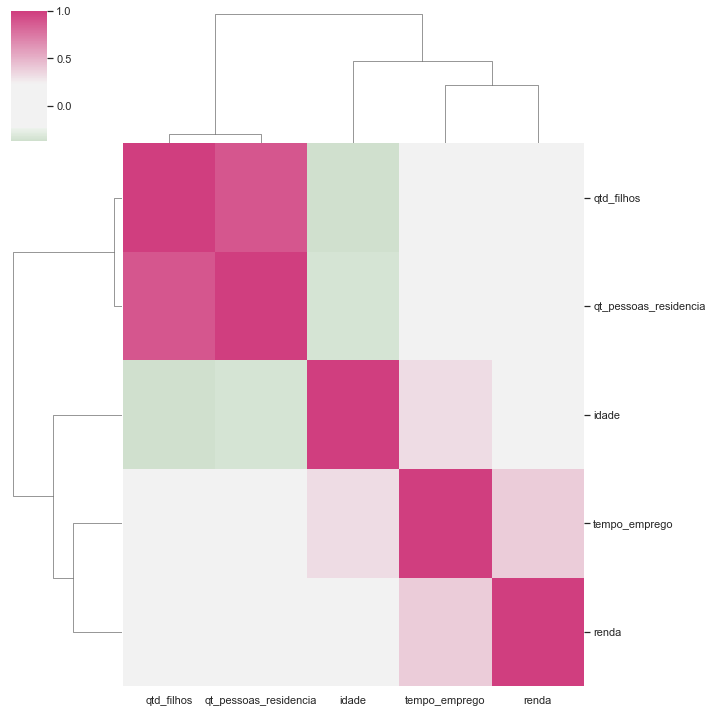

In [12]:
cmap = srn.diverging_palette(h_neg=125, h_pos=350, as_cmap=True, sep = 60, center = 'light')

srn.clustermap(dados[var_quant].corr(), figsize=(10, 10), center = 0, cmap=cmap);

Vemos que as variáveis quantitativas 'qt_pessoas_residência' e 'qtd_filhos' tem um valor elevado de correlação, ou seja, elas poderiam ser escritas em relação uma a outra, de forma que ao se fazer um modelo de ML uma das duas variáveis poderia ser retirada pois não adiciona valor ao enriquecimento.

### 2) Avalie um gráfico de dispersão (*scatterplot*) específico para as duas variáveis mais correlacionadas com *renda*.

As variáveis mais correlacionadas com 'renda' são 'idade' e 'tempo_emprego'

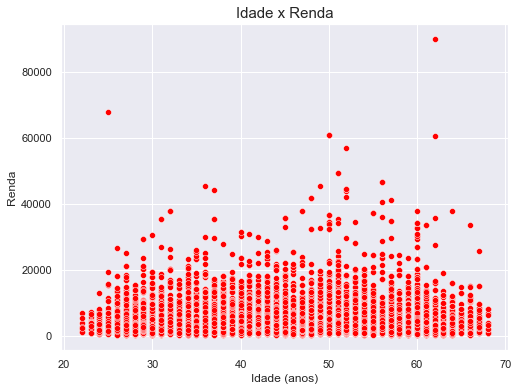

In [25]:
plt.figure(figsize=(8,6))
plt.title('Idade x Renda', size=15)
srn.scatterplot(x=dados['idade'], y=dados['renda'], color='red');
plt.xlabel('Idade (anos)')
plt.ylabel('Renda')
plt.show()

Não vemos nenhuma relação linear forte aparente

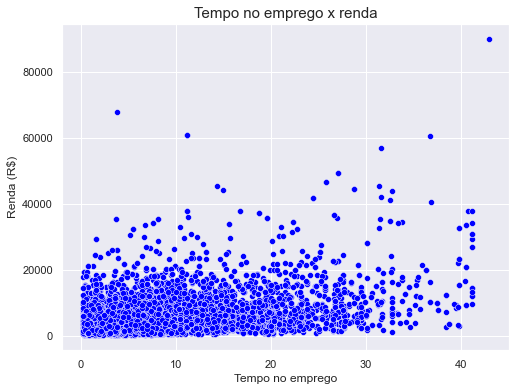

In [27]:
plt.figure(figsize=(8,6))
plt.title('Tempo no emprego x renda', size=15)
srn.scatterplot(x=dados['tempo_emprego'], y=dados['renda'], color='blue');
plt.xlabel('Tempo no emprego')
plt.ylabel('Renda (R$)')
plt.show()

Também não vemos nenhuma relação linear forte aparente

### 3) Na su aopinião, há outliers na variável renda?

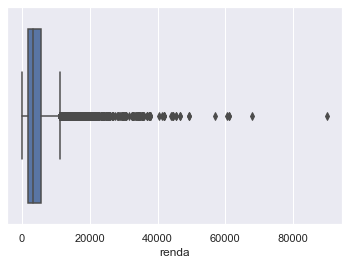

In [29]:
srn.boxplot(x=dados['renda']);

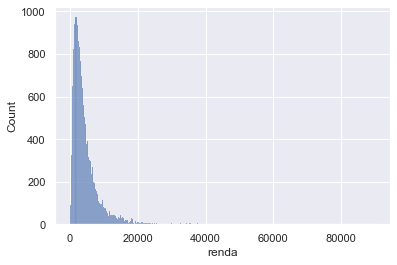

In [30]:
srn.histplot(x=dados['renda']);

Acho que há outlier sim, e eles estão prejudicando a análise

### 4) Calcule o logaritmo da variável renda e repita a sequência de análise

In [34]:
dados_quant = dados[var_quant]
dados_quant.loc[:,'log_renda'] = np.log(dados['renda'])
dados_quant.head()

<ipython-input-34-1db571334c0d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_quant.loc[:,'log_renda'] = np.log(dados['renda'])


,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda,log_renda
0,1,36,3.575342,3.0,3369.24,8.122442
1,0,42,0.860274,2.0,6096.14,8.715411
2,2,31,8.065753,4.0,5658.98,8.640999
3,0,50,1.208219,2.0,7246.69,8.888300
4,0,52,13.873973,2.0,4017.37,8.298383


In [35]:
dados_quant.corr()

,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda,log_renda
qtd_filhos,1.000000,-0.364303,-0.074250,0.896488,0.009567,0.023743
idade,-0.364303,1.000000,0.323934,-0.338805,0.042570,0.024712
tempo_emprego,-0.074250,0.323934,1.000000,-0.065748,0.394235,0.379556
qt_pessoas_residencia,0.896488,-0.338805,-0.065748,1.000000,0.020977,0.036267
renda,0.009567,0.042570,0.394235,0.020977,1.000000,0.835734
log_renda,0.023743,0.024712,0.379556,0.036267,0.835734,1.000000


Os valores de correlação cresceram bastante!

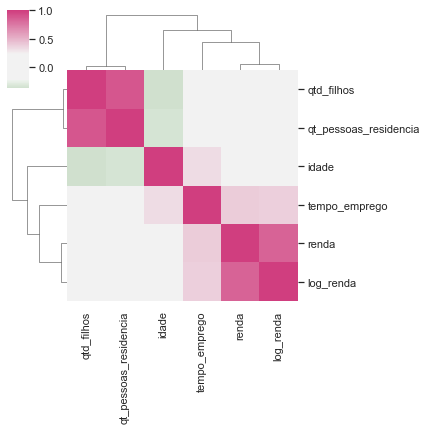

In [37]:
cmap = srn.diverging_palette(h_neg=125, h_pos=350, as_cmap=True, sep = 60, center = 'light')

srn.clustermap(dados_quant.corr(), figsize=(6, 6), center = 0, cmap=cmap);

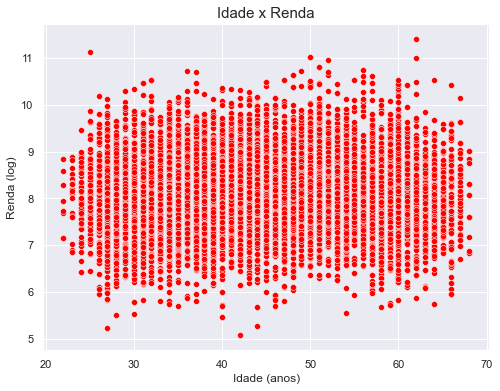

In [39]:
plt.figure(figsize=(8,6))
plt.title('Idade x Renda', size=15)
srn.scatterplot(x=dados_quant['idade'], y=dados_quant['log_renda'], color='red');
plt.xlabel('Idade (anos)')
plt.ylabel('Renda (log)')
plt.show()

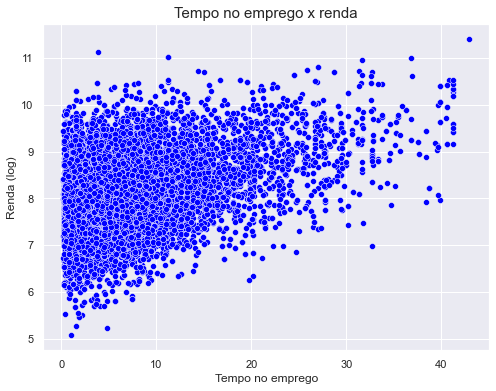

In [40]:
plt.figure(figsize=(8,6))
plt.title('Tempo no emprego x renda', size=15)
srn.scatterplot(x=dados_quant['tempo_emprego'], y=dados_quant['log_renda'], color='blue');
plt.xlabel('Tempo no emprego')
plt.ylabel('Renda (log)')
plt.show()

### 5) A aplicação do LOG você acha que melhorou ou piorou a análise?

Eu acho que melhorou pois percebemos uma melhor correlação entre as variáveis 'log_renda' e 'tempo_emprego'